# Data Pipeline

#### Working from existing pipeline from previous progress reports

### Part 1: Webscraping news articles. Data pipeline [here](scraping_scripts.ipynb)

#### Install packages

In [5]:
import html5lib
import bs4
import requests
from bs4 import BeautifulSoup
import urllib
import urllib.request
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import json

#### Creating list of Vox articles to parse

In [18]:
vox_URLs = ['https://www.vox.com/the-logoff-newsletter-trump/407468/trump-tariff-market-crash-economy-recession', 
            'https://www.vox.com/politics/407296/stagflation-trump-tariffs-recession-inflation-risk-odds', 
            'https://www.vox.com/donald-trump/407337/trump-tariffs-risk-split-lose-gop-winning-coalition-majority-disapprove-opinion-latino-black-gen-z', 
            'https://www.vox.com/culture/407365/nintendo-switch-2-delay-preorder-tariff-trump-how-to', 
            'https://www.vox.com/the-logoff-newsletter-trump/407344/laura-loomer-trump-nsa-director', 
            'https://www.vox.com/politics/407222/trump-tariff-loomer-kennedy', 
            'https://www.vox.com/scotus/407196/supreme-court-trump-tariffs-emily-ley-paper', 
            'https://www.vox.com/today-explained-podcast/407112/trump-tariffs-china-vietnam-south-korea', 
            'https://www.vox.com/politics/407111/trump-tariff-formula-calculation-russia-economy-dow-sp', 
            'https://www.vox.com/politics/407053/trump-tariff-expensive-democracy-authoritarianism-breakdown', 
            'https://www.vox.com/scotus/407051/supreme-court-trump-tariffs-major-questions', 
            'https://www.vox.com/politics/407025/trump-tariffs-reciprocal-trade-war-why-explanation-nostalgia', 
            'https://www.vox.com/politics/406934/wisconsin-electorate-liberal-democratic-turnout-election-trump-voter-republican', 
            'https://www.vox.com/the-logoff-newsletter-trump/406939/trump-tariffs-logoff', 
            'https://www.vox.com/politics/406467/trump-tariffs-prices-liberation-day-economy', 
            'https://www.vox.com/scotus/406879/supreme-court-planned-parenthood-south-carolina-medina-medicaid-abortion', 
            'https://www.vox.com/immigration/406697/trump-immigration-deportation-poll-public-opinion-economy-approval-border', 
            'https://www.vox.com/on-the-right-newsletter/406672/trump-student-deportations-rumeysa-ozturk-campus-free-speech', 
            'https://www.vox.com/politics/406742/wisconsin-supreme-court-election-results-susan-crawford-brad-schimel-elon-musk-democrats', 
            'https://www.vox.com/scotus/406719/trump-attack-immigrants-supreme-court', 
            'https://www.vox.com/politics/406690/trump-el-salvador-deportation-prison-court', 
            'https://www.vox.com/policy/406637/hasan-piker-gop-trump-gen-z-democrats-woke', 
            'https://www.vox.com/politics/406606/cory-booker-marathon-speech-filibuster-senate-floor-briefly-explained-protest', 
            'https://www.vox.com/politics/405748/democrats-leader-michelle-obama-savior-sanders-aoc-walz-biden-harris',
            'https://www.vox.com/the-logoff-newsletter-trump/406531/trump-third-presidential-term-constitution-briefly-explained']
len(vox_URLs)

25

#### Creating list of Fox articles to parse

In [19]:
fox_URLs = ['https://www.foxnews.com/politics/musk-spars-white-house-advisor-peter-navarro-dumber-than-sack-bricks', 
            'https://www.foxnews.com/politics/gabbard-establishes-new-intelligence-community-task-force-restore-transparency', 
            'https://www.foxnews.com/politics/trump-backed-bill-rein-federal-judges-gets-house-wide-vote', 
            'https://www.foxnews.com/media/pam-bondi-warns-migrant-criminals-coming-after-you-supreme-court-lifts-stay-deportations', 
            'https://www.foxnews.com/politics/trump-hauls-millions-house-gop-2026-war-chest-dems-taunt-running-scared', 
            'https://www.foxnews.com/politics/white-house-us-lead-ai-china-catching-up', 
            'https://www.foxnews.com/politics/huckabee-nomination-clears-senate-hurdle-us-ambassador-israel', 
            'https://www.foxnews.com/politics/elbridge-colby-confirmed-top-pentagon-policy-post-after-hesitation-from-gop-hawks', 
            'https://www.foxnews.com/sports/maine-lawmakers-send-letter-trump-condemning-gov-janet-mills-over-trans-athlete-girls-sports-policies', 
            'https://www.foxnews.com/politics/house-republicans-worry-even-trump-cant-save-them-tax-cuts-budget-bill-hang-balance', 
            'https://www.foxnews.com/politics/trump-hegseth-reveal-whopping-figure-want-next-pentagon-budget', 
            'https://www.foxnews.com/politics/white-house-us-lead-ai-china-catching-up', 
            'https://www.foxnews.com/world/us-panama-taking-back-canal-from-chinas-influence-says-hegseth', 
            'https://www.foxnews.com/media/trump-more-like-soaring-eagle-than-lame-duck-record-number-executive-orders-polling-expert-says', 
            'https://www.foxnews.com/politics/huckabee-nomination-clears-senate-hurdle-us-ambassador-israel', 
            'https://www.foxnews.com/media/james-carville-warns-country-high-alert-asked-trump-might-try-rig-midterms', 
            'https://www.foxnews.com/politics/us-federal-agencies-unleash-coal-energy-after-biden-stifled-it-mine-baby-mine', 
            'https://www.foxnews.com/politics/trumps-crypto-chief-golden-age-digital-assets', 
            'https://www.foxnews.com/politics/dem-accuses-trump-admin-fire-sale-approach-gop-aims-lower-federal-govs-real-estate-portfolio', 
            'https://www.foxnews.com/politics/elbridge-colby-confirmed-top-pentagon-policy-post-after-hesitation-from-gop-hawks', 
            'https://www.foxnews.com/politics/many-failures-whistleblower-exposes-how-biden-era-official-soft-china-prioritized-dei', 
            'https://www.foxnews.com/politics/house-republicans-worry-even-trump-cant-save-them-tax-cuts-budget-bill-hang-balance', 
            'https://www.foxnews.com/politics/supreme-court-trump-probationary-federal-workers-ruling', 
            'https://www.foxnews.com/politics/scoop-treasury-secretary-bessent-huddle-key-republican-caucus-trump-enacts-tariff-plan', 
            'https://www.foxnews.com/media/usha-vance-reveals-how-switch-flipped-after-husband-joined-trump-ticket-says-maga-has-totally-welcomed-her']
len(fox_URLs)

25

#### Testing scraping on Pitt Linguistics webpages

In [ ]:
import html5lib
import bs4
import requests
from bs4 import BeautifulSoup
import time

headers = {'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9"}
pitt_URLs = ['https://www.linguistics.pitt.edu/graduate/ma-program', 'https://www.linguistics.pitt.edu/research', 'https://www.linguistics.pitt.edu/esl-tesol', 'https://www.linguistics.pitt.edu/languages']

pitt_data = []
for url in pitt_URLs:
    pitt_r = requests.get(url=url, headers=headers)
    #print(pitt_r.content[:1000])
    pitt_soup = BeautifulSoup(pitt_r.content, 'html5lib')
    #print(pitt_soup.prettify())
    table = pitt_soup.find('header')
    for row in table.find('div'):
        pitt_article = {}
        pitt_article['headline'] = table.find('li')
        pitt_data.append(pitt_article)
    time.sleep(10)
print(pitt_data[:1000])

### Part 2: Linguistic analysis of data

#### Starting with the Fox dataset

In [68]:
#reading in dataframe
fox_df = pd.read_csv('fox.csv')

In [93]:
#'tokens' column with tokenized text
fox_df["tokens"] = fox_df.apply(lambda row: [word.lower() for word in nltk.word_tokenize(row["text"])], axis=1)

#'length' column with article length in words
fox_df["length"] = fox_df.apply(lambda row: len(row["tokens"]), axis=1)

#'word_length' column with word lengths
fox_df["word_length"] = fox_df.apply(lambda row: [len(word) for word in row["tokens"]], axis=1)

#'avg_word_length' column with average word length
fox_df["avg_word_length"] = fox_df.apply(lambda row: np.mean(row["word_length"]), axis=1)

#frequency distribution of words in Fox articles
fox_df["freqdist"] = fox_df.apply(lambda row: nltk.FreqDist(row["tokens"]), axis=1)


In [94]:
fox_df.head()

,headline,text,Source,tokens,length,word_length,avg_word_length,freqdist
0,Musk spars with White House trade advisor Pete...,SpaceX and Tesla CEO Elon Musk sparred on soci...,Fox News,"[spacex, and, tesla, ceo, elon, musk, sparred,...",606,"[6, 3, 5, 3, 4, 4, 7, 2, 6, 5, 7, 4, 5, 5, 6, ...",4.217822,"{'spacex': 1, 'and': 9, 'tesla': 3, 'ceo': 1, ..."
1,Gabbard establishes new intelligence community...,EXCLUSIVE: Director of National Intelligence T...,Fox News,"[exclusive, :, director, of, national, intelli...",723,"[9, 1, 8, 2, 8, 12, 5, 7, 11, 1, 3, 4, 5, 7, 4...",5.199170,"{'exclusive': 1, ':': 2, 'director': 5, 'of': ..."
2,Trump-backed bill to rein in federal judges ge...,The House of Representatives is expected to vo...,Fox News,"[the, house, of, representatives, is, expected...",534,"[3, 5, 2, 15, 2, 8, 2, 4, 7, 2, 1, 4, 2, 5, 7,...",4.453184,"{'the': 23, 'house': 8, 'of': 7, 'representati..."
3,Pam Bondi warns migrant criminals 'we're comin...,Attorney General Pam Bondi warned illegal immi...,Fox News,"[attorney, general, pam, bondi, warned, illega...",451,"[8, 7, 3, 5, 6, 7, 9, 9, 2, 5, 7, 5, 4, 5, 3, ...",4.352550,"{'attorney': 1, 'general': 1, 'pam': 1, 'bondi..."
4,Trump hauls in millions for House GOP 2026 war...,FIRST ON FOX — As congressional Republicans ge...,Fox News,"[first, on, fox, —, as, congressional, republi...",812,"[5, 2, 3, 1, 2, 13, 11, 4, 2, 3, 1, 8, 6, 2, 3...",4.433498,"{'first': 1, 'on': 6, 'fox': 4, '—': 1, 'as': ..."


#### Creating list of all Fox News word tokens for further linguistic analysis

In [100]:
fox_all_toks = []
for i in range(len(fox_df)):
    fox_all_toks += fox_df["tokens"][i]
len(fox_all_toks)

20442

#### Now for the Vox dataset

In [87]:
#reading in dataframe
vox_df = pd.read_csv('vox.csv')

In [88]:
#flattening 'text' column
vox_df["text"] = vox_df["text"].apply(eval).apply(' '.join)
vox_df.head()

,headline,subheading,text,Source
0,"Trump’s tariff-driven market crash, briefly ex...","The Dow has lost more than 4,000 points since ...","This story appeared in The Logoff, a daily new...",Vox
1,America may be headed for this rare type of ec...,"Stagflation, explained.",President Donald Trump’s decision to impose la...,Vox
2,Trump’s tariffs risk destroying his winning co...,"Already distrusted on the economy, Trump’s tar...",As markets tank and the prospect of higher pri...,Vox
3,How the Nintendo Switch 2 delay explains Trump...,Trump threw a blue shell at Nintendo — and the...,It was a big week for the global economy — and...,Vox
4,A conspiracy theorist convinced Trump to fire ...,"Laura Loomer, a 9/11 truther, apparently gets ...","This story appeared in The Logoff, a daily new...",Vox


In [89]:
#exporting flattened text dataframe to csv for later use (if needed)
vox_df.to_csv('vox_flat.csv', index=False)

In [95]:
#'tokens' column with tokenized text
vox_df["tokens"] = vox_df.apply(lambda row: [word.lower() for word in nltk.word_tokenize(row["text"])], axis=1)

#'length' column with article length in words
vox_df["length"] = vox_df.apply(lambda row: len(row["tokens"]), axis=1)

#'word_length' column with word lengths
vox_df["word_length"] = vox_df.apply(lambda row: [len(word) for word in row["tokens"]], axis=1)

#'avg_word_length' column with average word length
vox_df["avg_word_length"] = vox_df.apply(lambda row: np.mean(row["word_length"]), axis=1)

#frequency distribution of words in Fox articles
vox_df["freqdist"] = vox_df.apply(lambda row: nltk.FreqDist(row["tokens"]), axis=1)

In [96]:
vox_df.head()

,headline,subheading,text,Source,tokens,length,word_length,avg_word_length,freqdist
0,"Trump’s tariff-driven market crash, briefly ex...","The Dow has lost more than 4,000 points since ...","This story appeared in The Logoff, a daily new...",Vox,"[this, story, appeared, in, the, logoff, ,, a,...",489,"[4, 5, 8, 2, 3, 6, 1, 1, 5, 10, 4, 5, 3, 4, 8,...",4.206544,"{'this': 5, 'story': 1, 'appeared': 1, 'in': 4..."
1,America may be headed for this rare type of ec...,"Stagflation, explained.",President Donald Trump’s decision to impose la...,Vox,"[president, donald, trump, ’, s, decision, to,...",1681,"[9, 6, 5, 1, 1, 8, 2, 6, 5, 7, 2, 3, 7, 7, 3, ...",4.453302,"{'president': 2, 'donald': 1, 'trump': 13, '’'..."
2,Trump’s tariffs risk destroying his winning co...,"Already distrusted on the economy, Trump’s tar...",As markets tank and the prospect of higher pri...,Vox,"[as, markets, tank, and, the, prospect, of, hi...",767,"[2, 7, 4, 3, 3, 8, 2, 6, 6, 7, 4, 4, 1, 3, 6, ...",4.432855,"{'as': 6, 'markets': 1, 'tank': 1, 'and': 23, ..."
3,How the Nintendo Switch 2 delay explains Trump...,Trump threw a blue shell at Nintendo — and the...,It was a big week for the global economy — and...,Vox,"[it, was, a, big, week, for, the, global, econ...",931,"[2, 3, 1, 3, 4, 3, 3, 6, 7, 1, 3, 3, 6, 1, 2, ...",4.250269,"{'it': 10, 'was': 3, 'a': 21, 'big': 1, 'week'..."
4,A conspiracy theorist convinced Trump to fire ...,"Laura Loomer, a 9/11 truther, apparently gets ...","This story appeared in The Logoff, a daily new...",Vox,"[this, story, appeared, in, the, logoff, ,, a,...",518,"[4, 5, 8, 2, 3, 6, 1, 1, 5, 10, 4, 5, 3, 4, 8,...",4.193050,"{'this': 4, 'story': 2, 'appeared': 1, 'in': 6..."


#### Creating list of all Vox word tokens for further linguistic analysis

In [101]:
vox_all_toks = []
for i in range(len(vox_df)):
    vox_all_toks += vox_df["tokens"][i]
len(vox_all_toks)

31689

### Part 3: Bigram Analysis

#### First, re-introducing tokenized word lists for all Fox News and all Vox articles

In [102]:
len(fox_all_toks), len(vox_all_toks)

(20442, 31689)

#### Creating frequency distributions for each word list

Frequency Distribution (with stopwords)

In [104]:
#With stopwords included

#Fox News frequency distribution
fox_freq = nltk.FreqDist(fox_all_toks)
#Vox frequency distribution
vox_freq = nltk.FreqDist(vox_all_toks)

Frequency Distribution adjusted to remove stopwords

In [127]:
#stopwords removed
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
punct = ['.', '""', '``', '&', ',', ';', ':', "''"]

#Fox News frequency distribution (without stopwords)
fox_toks_ns = [word for word in fox_all_toks if word not in stopwords and word not in punct]
fox_freq_ns = nltk.FreqDist(fox_toks_ns)

#Vox frequency distribution (without stopwords)
vox_toks_ns = [word for word in vox_all_toks if word not in stopwords and word not in punct]
vox_freq_ns = nltk.FreqDist(vox_toks_ns)

#### Looking at the 100 most common words in each word list

In [105]:
#Fox News top 100 words
fox_top100 = fox_freq.most_common(100)
#Vox top 100 words
vox_top100 = vox_freq.most_common(100)

[('the', 1076), (',', 920), ('to', 645), ('.', 512), ('and', 400), ('``', 389), ('of', 379), ('a', 304), ('in', 300), ("''", 280), ('that', 266), (';', 215), ('&', 208), ('nbsp', 207), ('on', 200), ('trump', 168), ('for', 165), ('is', 162), ("'s", 149), ('’', 140), ('said', 132), ('it', 132), ('he', 131), ('we', 114), ('with', 106), ('s', 98), ('house', 94), ('fox', 87), ('as', 85), ('this', 85), ('be', 84), ('have', 81), ('are', 80), ('news', 80), ('at', 77), ('i', 76), ('has', 75), ('was', 74), ('from', 73), ('not', 72), ('president', 71), ('administration', 67), ('an', 60), ('by', 59), ('will', 57), ('they', 56), ('u.s.', 55), ('his', 54), ('digital', 52), ('senate', 52), ('which', 49), ('american', 49), ('so', 49), ('would', 49), ('who', 44), ('get', 44), ('kratsios', 44), ('energy', 44), ('coal', 42), ('what', 41), ('federal', 41), ('their', 39), ('one', 39), ('our', 38), ('also', 38), ('here', 37), ('department', 37), ('more', 37), ('ai', 37), ('like', 37), (':', 35), ('people', 

In [111]:
#viewing first 50 of most common 100 words (Fox News)
for i in fox_top100[:50]:
    print(i)

('the', 1076)
(',', 920)
('to', 645)
('.', 512)
('and', 400)
('``', 389)
('of', 379)
('a', 304)
('in', 300)
("''", 280)
('that', 266)
(';', 215)
('&', 208)
('nbsp', 207)
('on', 200)
('trump', 168)
('for', 165)
('is', 162)
("'s", 149)
('’', 140)
('said', 132)
('it', 132)
('he', 131)
('we', 114)
('with', 106)
('s', 98)
('house', 94)
('fox', 87)
('as', 85)
('this', 85)
('be', 84)
('have', 81)
('are', 80)
('news', 80)
('at', 77)
('i', 76)
('has', 75)
('was', 74)
('from', 73)
('not', 72)
('president', 71)
('administration', 67)
('an', 60)
('by', 59)
('will', 57)
('they', 56)
('u.s.', 55)
('his', 54)
('digital', 52)
('senate', 52)


In [112]:
#viewing first 50 of most common 100 words (Vox)
for i in vox_top100[:50]:
    print(i)

(',', 1481)
('the', 1419)
('.', 1154)
('to', 801)
('of', 678)
('’', 677)
('a', 639)
('and', 626)
('in', 536)
('that', 520)
('s', 495)
('trump', 313)
('is', 303)
('it', 257)
('for', 256)
('on', 251)
('this', 203)
('tariffs', 201)
('are', 176)
('—', 176)
('“', 173)
('”', 171)
('as', 170)
('they', 162)
('be', 149)
('not', 140)
('with', 131)
('or', 130)
('have', 126)
('but', 125)
('more', 123)
('has', 118)
('by', 111)
('from', 107)
('us', 107)
('at', 104)
('his', 100)
('was', 100)
('i', 98)
('what', 97)
('will', 94)
('you', 91)
('an', 91)
('he', 89)
('like', 88)
('about', 87)
('their', 85)
('percent', 83)
('t', 82)
('can', 79)


#### WordCloud Visualizations (stopwords removed)

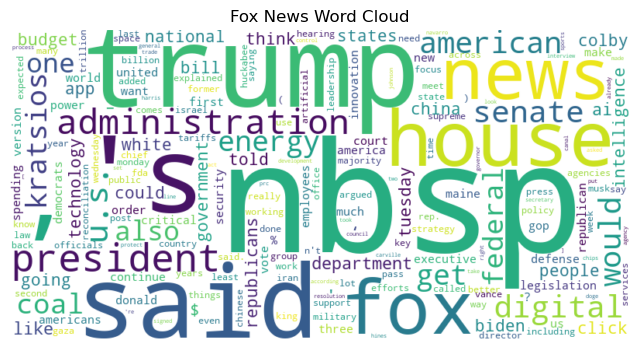

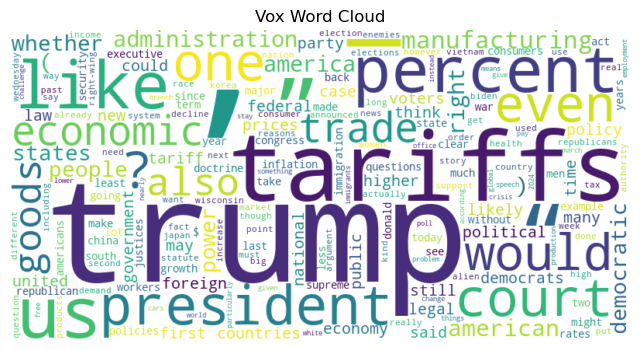

In [128]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Fox News word cloud
fox_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fox_freq_ns)
plt.figure(figsize=(8, 6))
plt.imshow(fox_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fox News Word Cloud')
plt.show()

#Vox word cloud
vox_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vox_freq_ns)
plt.figure(figsize=(8, 6))
plt.imshow(vox_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Vox Word Cloud')
plt.show()

### Part 4: Subjective Intensifiers